# <b>Trabalho 03 - Processo OSEMN</b>
#### <b>Maria Gabriele Bezerra da Silva - 403736</b>
#### <b>Mariana Teixeira de Castro - 403363</b>

No presente trabalho iremos trabalhar com problemas ligados a ciência de dados fazendo uso da aplicação do processo OSEMN. Este processo é definido por um conjunto de 5 (cinco) etapas: 


1. **O**btain - Obtenção dos dados;
2. **S**crub - Limpeza dos dados;
3. **E**xplore - Exploração dos dados;
4. **M**odel - Modelagem dos dados;
5. i**N**terpret - Interpretação dos dados.







# **1. Obtain - Obtenção dos dados**

Importando bibliotecas e conhecendo a base de dados

In [ ]:
#Importando bibliotecas
import pandas as pd
import csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from datetime import date, datetime

### 1.1 Acessando bases de dados disponibilizadas



In [ ]:
#Acessando bases de dados disponibilizadas
parte1 = pd.read_csv("Parte-I.csv", sep = ";") #lendo DataFrame - Parte 1

In [ ]:
parte1.head()

,date,lunch,dinner
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218


In [ ]:
parte2 = pd.read_csv("Parte-II.csv") #lendo DataFrame - Parte 2

In [ ]:
parte2.head()

,Data,Qt_almoco,Qt_jantar
0,2017-05-01,0,0
1,2017-05-02,734,491
2,2017-05-03,805,501
3,2017-05-04,807,555
4,2017-05-05,671,375


In [ ]:
parte3 = pd.read_csv("Parte-III.csv") #lendo DataFrame - Parte 3

In [ ]:
parte3.head()

,Unnamed: 0,Data,Qt_almoco,Qt_jantar
0,0,2018-01-02,0,0
1,1,2018-01-03,0,0
2,2,2018-01-04,0,0
3,3,2018-01-05,0,0
4,4,2018-01-08,69,0


# **2. Scrub - Limpeza e padronização dos dados**

Nesse processo iremos converter os dados de um formato para outro e consolidar tudo em um formato padronizado. Por exemplo, como nossos dados estão armazenados em vários arquivos CSV, nós iremos consolidará esses dados CSV em um único repositório, para que possamos processá-los e analisá-los.

### 2.1 Padronizando DataFrames

In [ ]:
parte1.head() 

,date,lunch,dinner
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218


In [ ]:
parte1.rename(columns = {'date':'Data', 'lunch':'Qt_almoco','dinner':'Qt_jantar'}, inplace = True) #padronizando nomes de colunas

In [ ]:
parte1.head() #verificando edição de colunas em DataFrame - Parte 1

,Data,Qt_almoco,Qt_jantar
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218


In [ ]:
parte1['Data'] = parte1['Data'].replace('"','') #convertendo valores de DataFrame Parte 1 para o mesmo formato dos valores dos DataFrames Parte 2 e Parte 3
parte1['Qt_almoco'] = parte1['Qt_almoco'].astype(int)
parte1['Qt_jantar'] = parte1['Qt_jantar'].astype(int)

In [ ]:
parte1.head() #DataFrame de Parte 1 editado

,Data,Qt_almoco,Qt_jantar
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218


In [ ]:
len(parte1) #verificando o número de linhas do DataFrame - Parte 1

339

In [ ]:
parte2.head() 

,Data,Qt_almoco,Qt_jantar
0,2017-05-01,0,0
1,2017-05-02,734,491
2,2017-05-03,805,501
3,2017-05-04,807,555
4,2017-05-05,671,375


In [ ]:
len(parte2) #verificando o número de linhas do DataFrame - Parte 2

349

In [ ]:
parte3.head()

,Unnamed: 0,Data,Qt_almoco,Qt_jantar
0,0,2018-01-02,0,0
1,1,2018-01-03,0,0
2,2,2018-01-04,0,0
3,3,2018-01-05,0,0
4,4,2018-01-08,69,0


In [ ]:
len(parte3) #verificando o número de linhas do DataFrame - Parte 3

582

In [ ]:
#Verificando o número de linhas da soma dos 3 DataFrames
total_linhas = len(parte1) + len(parte2) + len(parte3)
print(total_linhas)

1270


In [ ]:
parte3 = parte3.drop(columns=['Unnamed: 0']) # Retirando colunas desnecessárias do DataFrame - Parte 3

In [ ]:
parte3.head(582) #Imprimindo últimas linhas do DataFrame - Parte 3

,Data,Qt_almoco,Qt_jantar
0,2018-01-02,0,0
1,2018-01-03,0,0
2,2018-01-04,0,0
3,2018-01-05,0,0
4,2018-01-08,69,0
...,...,...,...
577,2020-03-25,0,0
578,2020-03-26,11,13
579,2020-03-27,15,14
580,2020-03-30,13,12


### 2.2 Concatenando DataFrames 

In [ ]:
#Concatenando DataFrames
concatenando = pd.concat([parte1, parte2, parte3],ignore_index=True)

In [ ]:
concatenando # Visualizando DataFrame completo

,Data,Qt_almoco,Qt_jantar
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218
...,...,...,...
1265,2020-03-25,0,0
1266,2020-03-26,11,13
1267,2020-03-27,15,14
1268,2020-03-30,13,12


In [ ]:
concatenando.to_csv("tabela_completa.csv", index = False) # Salvando DataFrame completo em um arquivo .csv

In [ ]:
completo = pd.read_csv("tabela_completa.csv") # Lendo arquivo 

In [ ]:
completo.head()

,Data,Qt_almoco,Qt_jantar
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218


### 2.3 Separação da coluna **Data** em três colunas **Dia** , **Mês** e **Ano** e extraindo **Dia da Semana**



Este passo nos ajudará a analisar os dados com base em uma série temporal.

In [ ]:
# Testando separação dos dados em dia, mês, dia da semana e ano
data_str = completo['Data'][0] # testando um valor
data_obj = datetime.strptime(data_str, '%Y-%m-%d') # extraindo dia, mes e ano

data = date(year=data_obj.year, month=data_obj.month, day=data_obj.day) # Formatando dados
indice_da_semana = data.weekday() # Extraindo índice referênte ao dia da semana
# Criando lista com os dias da semana
DIAS = [
    'Segunda-feira',
    'Terça-feira',
    'Quarta-feira',
    'Quinta-Feira',
    'Sexta-feira',
    'Sábado',
    'Domingo'
]

# Imprimindo dados extraídos
print('Data:', data_obj.date())
print('Dia:', data_obj.day)
print('Dia da Semana:', DIAS[indice_da_semana])
print('Mês:', data_obj.month)
print('Ano:', data_obj.year)

Data: 2016-01-04
Dia: 4
Dia da Semana: Segunda-feira
Mês: 1
Ano: 2016


In [ ]:
#Separando cada tipo de informação em uma lista
dia = []
dia_semana = []
mes = []
ano = []

#Declara dias da semana
DIAS = [
    'Segunda-feira',
    'Terça-feira',
    'Quarta-feira',
    'Quinta-Feira',
    'Sexta-feira',
    'Sábado',
    'Domingo'
]
#Alimentando listas
for i in range(0, len(completo['Data'])):
  data_str = completo['Data'][i].strip(" ") # Retirando espaços vazios caso existam
  data_obj = datetime.strptime(data_str, '%Y-%m-%d') # #extraindo dia, mes e ano
  
  data = date(year=data_obj.year, month=data_obj.month, day=data_obj.day) # #Extraindo índice referênte ao dia da semana
  indice_da_semana = data.weekday() # Extraindo índice referênte ao dia da semana
  dia.append(data_obj.day) #alimentando lista dia
  dia_semana.append(DIAS[indice_da_semana]) #alimentando lista dia_semana
  mes.append(data_obj.month) #alimentando lista mês
  ano.append(data_obj.year) #alimentando lista ano

#Imprimindo listas
print("Dia: " + str(dia))
print("Dia: " + str(dia_semana))
print("Mês: " + str(mes))
print("Ano: " + str(ano))

Dia: [4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 28, 29, 30, 31, 1, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 30, 31, 1, 2, 3, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 27, 28, 29, 30, 1, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 29, 30, 31, 1, 2, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 31, 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 28, 29, 30, 1, 2, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 2

In [ ]:
#Inserindo colunas no DataFrame completo
completo.insert(1, "Dia", dia)
completo.insert(1, "Dia da Semana", dia_semana)
completo.insert(1, "Mês", mes)
completo.insert(1, "Ano", ano)

In [ ]:
completo.head() #Visualizando nova tabela

,Data,Ano,Mês,Dia da Semana,Dia,Qt_almoco,Qt_jantar
0,2016-01-04,2016,1,Segunda-feira,4,364,294
1,2016-01-05,2016,1,Terça-feira,5,489,363
2,2016-01-06,2016,1,Quarta-feira,6,522,401
3,2016-01-07,2016,1,Quinta-Feira,7,514,349
4,2016-01-08,2016,1,Sexta-feira,8,409,218


In [ ]:
full_data2 = completo.to_csv("tabela_completa2.csv", index = False) # Salvando DataFrame completo2 em um arquivo .csv

In [ ]:
completo2 = pd.read_csv("tabela_completa2.csv") # Lendo arquivo completo2

In [ ]:
completo2.head(1000) #Visualizando tabela tratada

,Data,Ano,Mês,Dia da Semana,Dia,Qt_almoco,Qt_jantar
0,2016-01-04,2016,1,Segunda-feira,4,364,294
1,2016-01-05,2016,1,Terça-feira,5,489,363
2,2016-01-06,2016,1,Quarta-feira,6,522,401
3,2016-01-07,2016,1,Quinta-Feira,7,514,349
4,2016-01-08,2016,1,Sexta-feira,8,409,218
...,...,...,...,...,...,...,...
995,2019-03-07,2019,3,Quinta-Feira,7,603,426
996,2019-03-08,2019,3,Sexta-feira,8,563,351
997,2019-03-11,2019,3,Segunda-feira,11,789,516
998,2019-03-12,2019,3,Terça-feira,12,928,558


### 2.4 Análise de dados da tabela_completa2

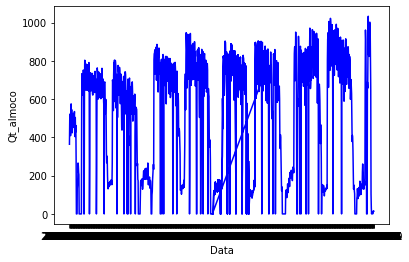

In [ ]:
#Gráfico Data x Qt_almoço
plt.plot(completo2['Data'], completo2['Qt_almoco'],  color='blue')
plt.xlabel("Data")
plt.ylabel("Qt_almoco")
plt.show()

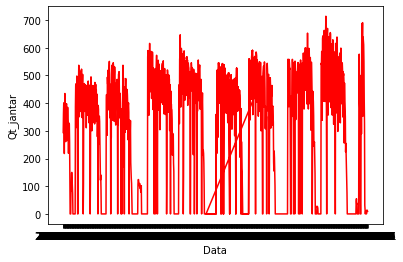

In [ ]:
#Gráfico Data x Qt_jantar
plt.plot(completo2['Data'], completo2['Qt_jantar'],  color='red')
plt.xlabel("Data")
plt.ylabel("Qt_jantar")
plt.show()

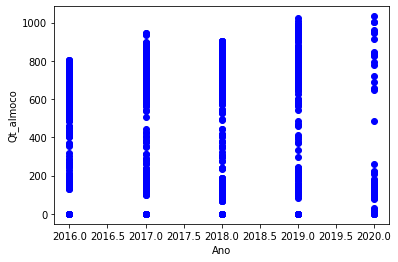

In [ ]:
#Gráfico Ano x Qt_almoco
plt.scatter(completo2['Ano'], completo2['Qt_almoco'],  color='blue')
plt.xlabel("Ano")
plt.ylabel("Qt_almoco")
plt.show()

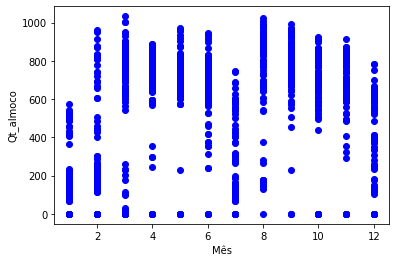

In [ ]:
#Gráfico Data x Qt_almoco
plt.scatter(completo2['Mês'], completo2['Qt_almoco'],  color='blue')
plt.xlabel("Mês")
plt.ylabel("Qt_almoco")
plt.show()

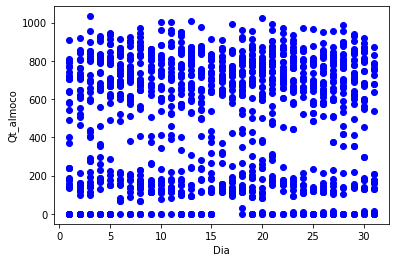

In [ ]:
#Gráfico Data x Qt_almoco
plt.scatter(completo2['Dia'], completo2['Qt_almoco'],  color='blue')
plt.xlabel("Dia")
plt.ylabel("Qt_almoco")
plt.show()

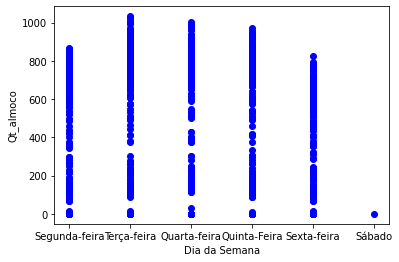

In [ ]:
#Gráfico Data x Qt_almoco
plt.scatter(completo2['Dia da Semana'], completo2['Qt_almoco'],  color='blue')
plt.xlabel("Dia da Semana")
plt.ylabel("Qt_almoco")
plt.show()

# **3. Explore - Exploração dos dados**

### 3.1 Utilizando a Ferramenta Pandas Profiling

Nesta etapa nosso objetivo é conhecer os dados que estamos trabalhando.

Podemos a ferramenta Pandas Profiling para essa etapa:

In [ ]:
# instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 21.9 MB 138 kB/s
     |████████████████████████████████| 596 kB 5.2 MB/s 
     |████████████████████████████████| 102 kB 54.3 MB/s 
     |████████████████████████████████| 690 kB 9.2 MB/s 
     |████████████████████████████████| 4.7 MB 33.6 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 812 kB 64.4 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=c691926ee5ee3919fd556696846b4d7b9c61d27ac3fe2075f428d07c288b29eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-rpd9ya67/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a279c65a3965ee9cd042ddc47274730a41679677853756a60817b223f8dc721e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c

In [ ]:
# import o ProfileReport
from pandas_profiling import ProfileReport

In [ ]:
# executando o profile
profile = ProfileReport(completo2, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Observações**

*   *O coeficiente de correlação varia de `-1` a `1`. 
Se valor é próximo de 1, isto significa que existe uma forte correlação positiva entre as variáveis. Quando esse número é próximo de -1, as variáveis tem uma forte correlação negativa.*

*   *O relatório que executamos acima nos mostra que a nossa variável `Qt_Jantar` é fortemente correlacionada com a variável `Qt_Almoço`.*

*  Ao longo de nossa exploração também iremos abordar a avaliação dos atributo `Dia`, `Mês` e `Ano`, para melhor análise.

In [ ]:
# salvando o relatório no disco
profile.to_file(output_file="Relatorio.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 3.2 Obtendo informações da base de dados manualmente

In [ ]:
# Check missing values
completo2.isnull().sum()

Data             0
Ano              0
Mês              0
Dia da Semana    0
Dia              0
Qt_almoco        0
Qt_jantar        0
dtype: int64

In [ ]:
# um pouco de estatística descritiva
completo2.describe()

,Ano,Mês,Dia,Qt_almoco,Qt_jantar
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,2017.697638,6.048031,15.778740,515.511811,303.391339
std,1.146445,3.411850,8.777471,314.322950,226.777077
min,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,2017.000000,3.000000,8.000000,165.250000,0.000000
50%,2018.000000,6.000000,16.000000,645.500000,382.500000
75%,2019.000000,9.000000,23.000000,782.750000,500.000000
max,2020.000000,12.000000,31.000000,1033.000000,714.000000


Analisando a Correlação das colunas da base de dados

In [ ]:
# Calcule a correlação  
correlacoes = completo2.corr()

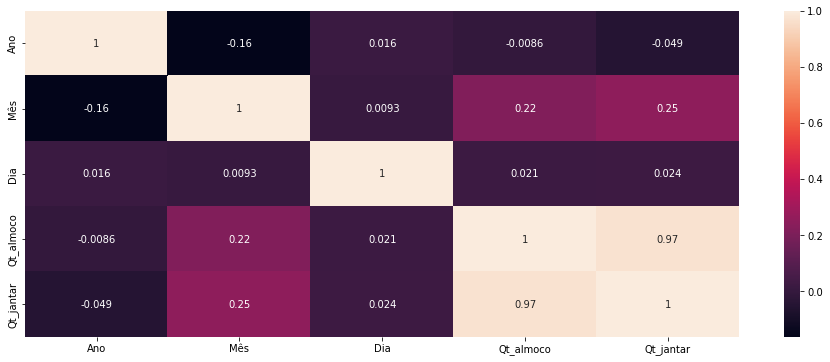

In [ ]:
# Usando o método heatmap do seaborn (Mapa de calor)
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

Visualizando a relação entre algumas features

### 3.3 Trabalhando com o Plotly

In [261]:
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 3.9 MB/s 
     |████████████████████████████████| 357 kB 44.5 MB/s 


In [ ]:
# Importando o Plotly
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [ ]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [263]:
import yaml
import plotly as px

In [264]:
import plotly.express as px

In [265]:
# Qt_jantar vs Qt_almoco (Quantidade de refeições no jantar e Quantidade de refeições no almoço)
fig = px.scatter(completo2, x=completo2.Qt_jantar, y=completo2.Qt_almoco)
fig.show()

In [266]:
# Dia vs Qt_jantar
fig = px.scatter(completo2, x=completo2.Dia, y=completo2.Qt_jantar)
fig.show()

In [267]:
# Dia vs Qt_almoco
fig = px.scatter(completo2, x=completo2.Dia, y=completo2.Qt_almoco)
fig.show()

In [268]:
# Mês vs Qt_jantar
fig = px.scatter(completo2, x=completo2.Mês, y=completo2.Qt_jantar)
fig.show()

In [269]:
# Mês vs Qt_almoco
fig = px.scatter(completo2, x=completo2.Mês, y=completo2.Qt_almoco)
fig.show()

In [270]:
# Ano vs Qt_jantar
fig = px.scatter(completo2, x=completo2.Ano, y=completo2.Qt_jantar)
fig.show()

In [271]:
# Ano vs Qt_almoco
fig = px.scatter(completo2, x=completo2.Ano, y=completo2.Qt_almoco)
fig.show()

### 3.4 Analisando Outliers

In [ ]:
# estatística descritiva das variáveis
completo2[['Qt_almoco','Qt_jantar','Dia', 'Mês', 'Ano']].describe()

,Qt_almoco,Qt_jantar,Dia,Mês,Ano
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,515.511811,303.391339,15.778740,6.048031,2017.697638
std,314.322950,226.777077,8.777471,3.411850,1.146445
min,0.000000,0.000000,1.000000,1.000000,2016.000000
25%,165.250000,0.000000,8.000000,3.000000,2017.000000
50%,645.500000,382.500000,16.000000,6.000000,2018.000000
75%,782.750000,500.000000,23.000000,9.000000,2019.000000
max,1033.000000,714.000000,31.000000,12.000000,2020.000000


In [272]:
# imprimindo os 10 maiores valores das variáveis Qt_jantar e Qt_almoco
completo2[['Dia','Mês','Ano','Qt_jantar', 'Qt_almoco']].nlargest(10, 'Qt_jantar')

,Dia,Mês,Ano,Qt_jantar,Qt_almoco
1119,28,8,2019,714,989
1251,5,3,2020,691,944
1249,3,3,2020,687,1033
1125,4,9,2019,670,918
1118,27,8,2019,664,957
1113,20,8,2019,663,1022
1135,18,9,2019,655,927
1124,3,9,2019,654,958
1053,28,5,2019,653,954
1134,17,9,2019,651,991


In [273]:
# visualizando a distribuição da variável Qt_jantar
import plotly.figure_factory as ff
labels = ['Distribuição da variável Qt_jantar (Quantidade de refeições no Jantar)']
fig = ff.create_distplot([completo2.Qt_jantar], labels, bin_size=.2)
fig.show()

In [274]:
# Visualizando outliers na variável Qt_jantar
import plotly.express as px

fig = px.box(completo2, y='Qt_jantar')
fig.update_layout( width=800,height=800)
fig.show()

In [275]:
# Histogram da variável Qt_jantar
fig = px.histogram(completo2, x="Qt_jantar", nbins=50, opacity=0.50)
fig.show()

In [276]:
# visualizando a distribuição da variável Qt_almoco
import plotly.figure_factory as ff
labels = ['Distribuição da variável Qt_almoco (Quantidade de refeições no Almoço)']
fig = ff.create_distplot([completo2.Qt_almoco], labels, bin_size=.2)
fig.show()

In [277]:
# Visualizando outliers na variável Qt_almoco
import plotly.express as px

fig = px.box(completo2, y='Qt_almoco')
fig.update_layout( width=800,height=800)
fig.show()

In [278]:
# Histogram da variável Qt_almoco
fig = px.histogram(completo2, x="Qt_almoco", nbins=50, opacity=0.50)
fig.show()

### 3.5 Analisando a simetria dos dados

In [279]:
# carrega o método stats da scipy
from scipy import stats

In [ ]:
# imprime o coeficiente de pearson
stats.skew(completo2.Qt_jantar)


-0.31982745670450974

In [ ]:
# imprime o coeficiente de pearson
stats.skew(completo2.Qt_almoco)

-0.4098671200744163

Coeficiente de Pearson
*   Valor entre -1 e 1 - distribuição simétrica.
*   Valor maior que 1 - distribuição assimétrica positiva.
*   Valor maior que -1 - distribuição assimétrica negativa.

# **4. Model - Modelagem dos dados**

### 4.1 Definindo um Baseline

- `Uma baseline é importante para ter marcos no projeto`.
- `Permite uma explicação fácil para todos os envolvidos`.
- `É algo que sempre tentaremos ganhar na medida do possível`.

In [ ]:
# converte os dados de almoço e janta para int
completo2.Qt_almoco = completo2.Qt_almoco.astype(int)
completo2.Qt_jantar = completo2.Qt_jantar.astype(int)

In [ ]:
completo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Data           1270 non-null   object
 1   Ano            1270 non-null   int64 
 2   Mês            1270 non-null   int64 
 3   Dia da Semana  1270 non-null   object
 4   Dia            1270 non-null   int64 
 5   Qt_almoco      1270 non-null   int64 
 6   Qt_jantar      1270 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 69.6+ KB


In [ ]:
completo2

,Data,Ano,Mês,Dia da Semana,Dia,Qt_almoco,Qt_jantar
0,2016-01-04,2016,1,Segunda-feira,4,364,294
1,2016-01-05,2016,1,Terça-feira,5,489,363
2,2016-01-06,2016,1,Quarta-feira,6,522,401
3,2016-01-07,2016,1,Quinta-Feira,7,514,349
4,2016-01-08,2016,1,Sexta-feira,8,409,218
...,...,...,...,...,...,...,...
1265,2020-03-25,2020,3,Quarta-feira,25,0,0
1266,2020-03-26,2020,3,Quinta-Feira,26,11,13
1267,2020-03-27,2020,3,Sexta-feira,27,15,14
1268,2020-03-30,2020,3,Segunda-feira,30,13,12


In [ ]:
# definindo a regra para categorizar os dados
categoria_almoco = []
categoria_jantar = []

In [ ]:
# estatística descritiva da coluna Qt_almoco
completo2.Qt_almoco.describe()

count    1270.000000
mean      515.511811
std       314.322950
min         0.000000
25%       165.250000
50%       645.500000
75%       782.750000
max      1033.000000
Name: Qt_almoco, dtype: float64

In [ ]:
# alimenta a lista categoria almoco de acordo com os valores dos quartis
for i in completo2.Qt_almoco.iteritems():
  valor = (i[1])
  if valor <= 165:
    categoria_almoco.append('Classe D')
  elif valor < 645:
    categoria_almoco.append('Classe C')
  elif valor < 782:
    categoria_almoco.append('Classe B')
  else:
    categoria_almoco.append('Classe A')

In [ ]:
# estatística descritiva da coluna Qt_jantar
completo2.Qt_jantar.describe()

count    1270.000000
mean      303.391339
std       226.777077
min         0.000000
25%         0.000000
50%       382.500000
75%       500.000000
max       714.000000
Name: Qt_jantar, dtype: float64

In [ ]:
# alimenta a lista categoria almoco de acordo com os valores dos quartis
for i in completo2.Qt_jantar.iteritems():
  valor = (i[1])
  if valor <= 1:
    categoria_jantar.append('Classe D')
  elif valor < 385:
    categoria_jantar.append('Classe C')
  elif valor < 500:
    categoria_jantar.append('Classe B')
  else:
    categoria_jantar.append('Classe A')

In [ ]:
# cria colunas categorias
completo2['Categorias Almoco'] = categoria_almoco
completo2['Categorias Jantar'] = categoria_jantar

In [ ]:
completo2

,Data,Ano,Mês,Dia da Semana,Dia,Qt_almoco,Qt_jantar,Categorias Almoco,Categorias Jantar
0,2016-01-04,2016,1,Segunda-feira,4,364,294,Classe C,Classe C
1,2016-01-05,2016,1,Terça-feira,5,489,363,Classe C,Classe C
2,2016-01-06,2016,1,Quarta-feira,6,522,401,Classe C,Classe B
3,2016-01-07,2016,1,Quinta-Feira,7,514,349,Classe C,Classe C
4,2016-01-08,2016,1,Sexta-feira,8,409,218,Classe C,Classe C
...,...,...,...,...,...,...,...,...,...
1265,2020-03-25,2020,3,Quarta-feira,25,0,0,Classe D,Classe D
1266,2020-03-26,2020,3,Quinta-Feira,26,11,13,Classe D,Classe C
1267,2020-03-27,2020,3,Sexta-feira,27,15,14,Classe D,Classe C
1268,2020-03-30,2020,3,Segunda-feira,30,13,12,Classe D,Classe C


In [ ]:
# agrupa as categorias e calcula as médias
medias_almoco = completo2.groupby(by='Categorias Almoco')['Qt_almoco'].mean()
medias_jantar = completo2.groupby(by='Categorias Jantar')['Qt_jantar'].mean()

In [ ]:
# visualizando a variável medias_almoco
medias_almoco

Categorias Almoco
Classe A    852.253918
Classe B    714.386792
Classe C    417.479365
Classe D     75.943396
Name: Qt_almoco, dtype: float64

In [ ]:
# visualizando a variável medias_jantar
medias_jantar

Categorias Jantar
Classe A    551.134375
Classe B    449.345048
Classe C    258.708333
Classe D      0.000000
Name: Qt_jantar, dtype: float64

In [ ]:
# criando o dicionario com chaves Classes A, B, C e d, e seus valores
dic_almoco = {'Classe A': medias_almoco[0], 'Classe B': medias_almoco[1],'Classe C': medias_almoco[2], 'Classe D': medias_almoco[3]}
dic_jantar = {'Classe A': medias_jantar[0], 'Classe B': medias_jantar[1],'Classe C': medias_jantar[2], 'Classe D': medias_jantar[3]}

In [ ]:
# imprime dicionario almoco
dic_almoco

{'Classe A': 852.2539184952979,
 'Classe B': 714.3867924528302,
 'Classe C': 417.4793650793651,
 'Classe D': 75.94339622641509}

In [ ]:
# imprime dicionario jantar
dic_jantar

{'Classe A': 551.134375,
 'Classe B': 449.3450479233227,
 'Classe C': 258.7083333333333,
 'Classe D': 0.0}

In [ ]:
# cria a função retorna baseline almoco
def retorna_baseline_almoco(quant_almoco):
  if quant_almoco <= 165:
    return dic_almoco.get('Classe D')
  elif quant_almoco < 645:
    return dic_almoco.get('Classe C')
  elif quant_almoco < 782:
    return dic_almoco.get('Classe B')
  else:
    return dic_almoco.get('Classe A')

In [ ]:
# chama a função retorna baseline almoço
retorna_baseline_almoco(1)

75.94339622641509

In [ ]:
# cria a função retorna baseline jantar
def retorna_baseline_jantar(quant_jantar):
  if quant_jantar <= 165:
    return dic_jantar.get('Classe D')
  elif quant_jantar < 645:
    return dic_jantar.get('Classe C')
  elif quant_jantar < 782:
    return dic_jantar.get('Classe B')
  else:
    return dic_jantar.get('Classe A')

In [ ]:
# chama a função retorna baseline jantar
retorna_baseline_jantar(0)

0.0

In [ ]:
#Imprime a quantidade média e o valor médio dos almoços
for i in completo2.Qt_almoco.iteritems():
  quant_almoco = i[1]
  print('A quantidade de almoços é: {} , Valor médio: {}'.format(quant_almoco,retorna_baseline_almoco(quant_almoco)))

A quantidade de almoços é: 364 , Valor médio: 417.4793650793651
A quantidade de almoços é: 489 , Valor médio: 417.4793650793651
A quantidade de almoços é: 522 , Valor médio: 417.4793650793651
A quantidade de almoços é: 514 , Valor médio: 417.4793650793651
A quantidade de almoços é: 409 , Valor médio: 417.4793650793651
A quantidade de almoços é: 462 , Valor médio: 417.4793650793651
A quantidade de almoços é: 575 , Valor médio: 417.4793650793651
A quantidade de almoços é: 525 , Valor médio: 417.4793650793651
A quantidade de almoços é: 545 , Valor médio: 417.4793650793651
A quantidade de almoços é: 434 , Valor médio: 417.4793650793651
A quantidade de almoços é: 424 , Valor médio: 417.4793650793651
A quantidade de almoços é: 499 , Valor médio: 417.4793650793651
A quantidade de almoços é: 501 , Valor médio: 417.4793650793651
A quantidade de almoços é: 525 , Valor médio: 417.4793650793651
A quantidade de almoços é: 452 , Valor médio: 417.4793650793651
A quantidade de almoços é: 484 , Valor m

In [ ]:
#Imprime a quantidade média e o valor médio dos jantares
for i in completo2.Qt_jantar.iteritems():
  quant_jantar = i[1]
  print('A quantidade de jantares é: {} , Valor médio: {}'.format(quant_jantar,retorna_baseline_jantar(quant_jantar)))

A quantidade de jantares é: 294 , Valor médio: 258.7083333333333
A quantidade de jantares é: 363 , Valor médio: 258.7083333333333
A quantidade de jantares é: 401 , Valor médio: 258.7083333333333
A quantidade de jantares é: 349 , Valor médio: 258.7083333333333
A quantidade de jantares é: 218 , Valor médio: 258.7083333333333
A quantidade de jantares é: 372 , Valor médio: 258.7083333333333
A quantidade de jantares é: 435 , Valor médio: 258.7083333333333
A quantidade de jantares é: 388 , Valor médio: 258.7083333333333
A quantidade de jantares é: 341 , Valor médio: 258.7083333333333
A quantidade de jantares é: 261 , Valor médio: 258.7083333333333
A quantidade de jantares é: 371 , Valor médio: 258.7083333333333
A quantidade de jantares é: 391 , Valor médio: 258.7083333333333
A quantidade de jantares é: 398 , Valor médio: 258.7083333333333
A quantidade de jantares é: 382 , Valor médio: 258.7083333333333
A quantidade de jantares é: 265 , Valor médio: 258.7083333333333
A quantidade de jantares 

In [ ]:
# imprime as 5 primeiras linhas do dataframe
completo2.head()

,Data,Ano,Mês,Dia da Semana,Dia,Qt_almoco,Qt_jantar,Categorias Almoco,Categorias Jantar
0,2016-01-04,2016,1,Segunda-feira,4,364,294,Classe C,Classe C
1,2016-01-05,2016,1,Terça-feira,5,489,363,Classe C,Classe C
2,2016-01-06,2016,1,Quarta-feira,6,522,401,Classe C,Classe B
3,2016-01-07,2016,1,Quinta-Feira,7,514,349,Classe C,Classe C
4,2016-01-08,2016,1,Sexta-feira,8,409,218,Classe C,Classe C


### 4.2 Trabalhando com as Baselines

#### 4.2.1. Baseline Almoço

In [ ]:
# remove as colunas colineares, variavel alvo e a coluna categorias (Deixa só "Dia","Mês", "Ano")
X = completo2.drop(['Data','Dia da Semana','Qt_almoco','Qt_jantar','Categorias Almoco', 'Categorias Jantar'], axis=1)

In [ ]:
# variável 'y' é nossa variável alvo
y = completo2['Qt_almoco']

In [ ]:
# Dados na variável X
X.head()

,Ano,Mês,Dia
0,2016,1,4
1,2016,1,5
2,2016,1,6
3,2016,1,7
4,2016,1,8


In [ ]:
# Variável alvo
y.head()

0    364
1    489
2    522
3    514
4    409
Name: Qt_almoco, dtype: int64

#### 4.2.1.1. Separando os conjuntos de treino e teste

Para construir nosso modelo de Machine Learning precisamos dividir os dados em duas partes. Uma para treinar o modelo e outra para testar o modelo com dados que ele não conhece. Para isso iremos separar 80% dos dados para treino e 20% dos dados para teste. Para isso usaremos a biblioteca train_test_split que faz essa separação automaticamente.

In [ ]:
# carrega o método train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# divide os dados entre o conjunto de treino e teste, 80% e 20% respectivamente.
# define qualquer valor para o parâmetro random_state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

X_train é a parte usada para treinar o algoritmo

X_test é a parte usada para testar o algoritmo depois de treinado

y_train é a parte das respostas usadas no treino

y_test é a parte das respostas usadas para testar o algoritmo

In [ ]:
# imprime a quantidade de linhas dos conjuntos
print ('X_train: numero de linhas e colunas: {}'.format(X_train.shape))
print ('X_test: numero de linhas e colunas: {}'.format(X_test.shape))
print ('y_train: numero de linhas e colunas: {}'.format(y_train.shape))
print ('y_test: numero de linhas e colunas: {}'.format(y_test.shape))

X_train: numero de linhas e colunas: (1016, 3)
X_test: numero de linhas e colunas: (254, 3)
y_train: numero de linhas e colunas: (1016,)
y_test: numero de linhas e colunas: (254,)


In [ ]:
# imprimindo as 5 primeiras linhas dos dados de teste
X_test.head()

,Ano,Mês,Dia
15,2016,1,25
652,2018,7,13
1192,2019,12,10
1254,2020,3,10
45,2016,3,15


In [ ]:
# definindo uma lista de predicoes
predicoes = []

In [ ]:
# para cada elemento do teste alimenta a lista predicoes
for i in X_test.Dia.iteritems():
  n_almocos = i[1]
  predicoes.append(retorna_baseline_almoco(n_almocos))

In [ ]:
# imprime as 10 primeiras linhas da lista de predicoes
predicoes[:10]

[75.94339622641509,
 75.94339622641509,
 75.94339622641509,
 75.94339622641509,
 75.94339622641509,
 75.94339622641509,
 75.94339622641509,
 75.94339622641509,
 75.94339622641509,
 75.94339622641509]

#### 4.2.1.2. Atribuindo resultados a um dataframe

Manteremos um log ao longo do projeto
Permite a evolução dado o baseline

In [ ]:
# cria um dataframe vazio
df_results = pd.DataFrame()

In [ ]:
# adiciona a coluna valor_real
df_results['valor_real'] = y_test.values

In [ ]:
# cria a coluna valor_predito_baseline com as predicoes
df_results['valor_predito_baseline'] = predicoes

In [ ]:
# imprimindo as 10 primeiras linhas do df_results
df_results.head(10)

,valor_real,valor_predito_baseline
0,484,75.943396
1,94,75.943396
2,410,75.943396
3,1001,75.943396
4,733,75.943396
5,961,75.943396
6,206,75.943396
7,563,75.943396
8,383,75.943396
9,863,75.943396


#### 4.2.1.3. Plota o valor real e o baseline

In [ ]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dados preditos
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name='Valor Predito Baseline'))
# Plota a figura
fig.show()

#### 4.2.1.4. Avaliação do modelo baseline

In [ ]:
# calcula a métrica rmse
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, predicoes)))

In [ ]:
# imprime a performance do modelo
print ('Performance do modelo baseline:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo baseline:

RMSE é: 522.5214579143991 


### 4.3. Machine Learning

#### 4.3.1. Regressão Linear

- `Devido a correlação entre algumas features podemos usar uma regressão linear.`
- `Modelo simples e eficiente.`
- `Solução rápida e robusta.`

In [ ]:
# carrega o pacote LinearRegression
from sklearn.linear_model import LinearRegression

In [ ]:
# cria o objeto do tipo LinearRegression
lin_model = LinearRegression()

In [ ]:
# treina o algoritmo de regressão linear
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# avaliação do modelo nos dados de teste
y_pred = lin_model.predict(X_test)

In [ ]:
# calcula a métrica rmse
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
# imprime a performance do modelo
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 325.49876472517377 


In [ ]:
# atribui os resultados no dataframe df_results
df_results['valor_predito_reg_linear'] = lin_model.predict(X_test)

In [ ]:
df_results.head(10)

,valor_real,valor_predito_baseline,valor_predito_reg_linear
0,484,75.943396,411.177033
1,94,75.943396,543.632106
2,410,75.943396,649.505959
3,1001,75.943396,478.862330
4,733,75.943396,450.278034
5,961,75.943396,459.437671
6,206,75.943396,433.024241
7,563,75.943396,471.579927
8,383,75.943396,642.181609
9,863,75.943396,458.063805


In [ ]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dados de baseline
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name='Baseline'))

# Linha com os dados preditos pela regressão linear
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_reg_linear,
                         mode='lines',
                         line = dict(color = '#FEBFB3'),
                         name='Valor Predito Regressão Linear'))

# Plota a figura
fig.show()

#### 4.3.2. Arvore de decisão

*   `Algoritmo de aprendizado supervisionado`
*   `Explicabilidade do Modelo`
*   `Simples`

In [ ]:
# importa o pacote DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# cria um objeto do tipo DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [ ]:
# treina o algoritmo
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

##### 4.3.2.1. Avaliando o modelo de Árvore de Decisão

In [ ]:
# fazendo as previsões
y_pred = regressor.predict(X_test)

In [ ]:
# Adicionando o valor do modelo no dataframe df_results
df_results['valor_predito_arvore'] = y_pred

In [ ]:
# visualiza o dataframe df_results
df_results.head(10)

,valor_real,valor_predito_baseline,valor_predito_reg_linear,valor_predito_arvore
0,484,75.943396,411.177033,514.0
1,94,75.943396,543.632106,94.0
2,410,75.943396,649.505959,378.0
3,1001,75.943396,478.862330,1002.0
4,733,75.943396,450.278034,585.0
5,961,75.943396,459.437671,912.0
6,206,75.943396,433.024241,190.0
7,563,75.943396,471.579927,928.0
8,383,75.943396,642.181609,601.0
9,863,75.943396,458.063805,852.0


In [ ]:
import plotly.graph_objects as go

# cria uma figura
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name='Valor Predito Baseline'))


# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_reg_linear,
                         mode='lines+markers',
                         name='Valor Predito Reg Liner'))

# Linha com os dados preditos
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_arvore,
                         mode='lines+markers',
                         name='Valor Predito Arvore'))
# Plota a figura
fig.show()

Avaliação do Modelo

In [ ]:
# calcula a métrica rmse
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
# imprime a performance do modelo
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 180.8806976204303 


#### 4.3.3. Random Forest

- `Método Ensemble`
- `Mais robustez para os modelos`

In [ ]:
# Importa o método RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# cria o objeto rf_regressor
rf_regressor = RandomForestRegressor()

In [ ]:
# treina o algoritmo
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# avaliação do modelo nos dados de teste
y_pred = rf_regressor.predict(X_test)

In [ ]:
# adiciona os resultados no dataframe df_results
df_results['valor_predito_random_forest'] = rf_regressor.predict(X_test)

In [ ]:
# calcula a métrica rmse
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
# imprime a performance do modelo
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 176.74789544237035 


In [ ]:
# plota os resultados dos modelos e o valor real.
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='markers',
                         name='Valor Real'))

# Linha com os dados da baseline
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         line = dict(color = '#FF00FF'),
                         name='Valor da Baseline'))

# Linha com os dados preditos pela arvore
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_arvore,
                         mode='lines',
                         line = dict(color = '#B2FF66'),
                         name='Valor Predito Árvore'))

# Linha com os dados preditos pela regressão linear
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_reg_linear,
                         mode='lines',
                         line = dict(color = '#17BECF'),
                         name='Valor Predito Regressão Linear'))


# Linha com os dados preditos pela Random Forest
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_random_forest,
                         mode='lines',
                         line = dict(color = '#7F7F7F'),
                         name='Valor Predito Random Forest'))

# Plota a figura
fig.show()

Instalando a yellowbrick


In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **5. Interpret - Intepretação dos dados**